
# Face detection using a cascade classifier

This computer vision example shows how to detect faces on an image using object
detection framework based on machine learning.

First, you will need an xml file, from which the trained data can be read.  The
framework works with files, trained using Multi-block Local Binary Patterns
Features (See [MB-LBP](plot_multiblock_local_binary_pattern.html)) and Gentle
Adaboost with attentional cascade. So, the detection framework will also work
with [xml files from OpenCV](https://github.com/opencv/opencv/tree/master/data/lbpcascades).  There you
can find files that were trained to detect cat faces, profile faces and other
things.  But if you want to detect frontal faces, the respective file is
already included in scikit-image.

Next you will have to specify the parameters for the ``detect_multi_scale``
function. Here you can find the meaning of each of them.

First one is ``scale_ratio``. To find all faces, the algorithm does the search
on multiple scales. This is done by changing the size of searching window. The
smallest window size is the size of window that was used in training. This size
is specified in the xml file with trained parameters. The ``scale_ratio``
parameter specifies by which ratio the search window is increased on each
step. If you increase this parameter, the search time decreases and the
accuracy decreases. So, faces on some scales can be not detected.

``step_ratio`` specifies the step of sliding window that is used to search for
faces on each scale of the image. If this parameter is equal to one, then all
the possible locations are searched. If the parameter is greater than one, for
example, two, the window will be moved by two pixels and not all of the
possible locations will be searched for faces. By increasing this parameter we
can reduce the working time of the algorithm, but the accuracy will also be
decreased.

``min_size`` is the minimum size of search window during the scale
search. ``max_size`` specifies the maximum size of the window. If you know the
size of faces on the images that you want to search, you should specify these
parameters as precisely as possible, because you can avoid doing expensive
computations and possibly decrease the amount of false detections. You can save
a lot of time by increasing the ``min_size`` parameter, because the majority of
time is spent on searching on the smallest scales.

``min_neighbor_number`` and ``intersection_score_threshold`` parameters are
made to cluster the excessive detections of the same face and to filter out
false detections.  True faces usually has a lot of detections around them and
false ones usually have single detection. First algorithm searches for
clusters: two rectangle detections are placed in the same cluster if the
intersection score between them is larger then
``intersection_score_threshold``. The intersection score is computed using the
equation (intersection area) / (small rectangle ratio). The described
intersection criteria was chosen over intersection over union to avoid a corner
case when small rectangle inside of a big one have small intersection score.
Then each cluster is thresholded using ``min_neighbor_number`` parameter which
leaves the clusters that have a same or bigger number of detections in them.

You should also take into account that false detections are inevitable and if
you want to have a really precise detector, you will have to train it yourself
using [OpenCV train cascade utility](https://docs.opencv.org/2.4/doc/user_guide/ug_traincascade.html).


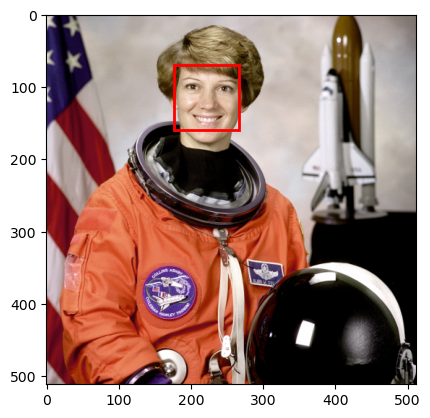

In [1]:
from skimage import data
from skimage.feature import Cascade

import matplotlib.pyplot as plt
from matplotlib import patches

# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)

img = data.astronaut()

detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(123, 123))

plt.imshow(img)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:

    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()